In [16]:
#importing in the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import datetime as dt
%matplotlib inline

### Exploring the data

In [17]:
#reading in the csv
fcs_data_2020 = pd.read_csv('../data/Crisis_2020_redacted.csv', encoding = 'latin-1', low_memory = False)
fcs_data_2019 = pd.read_csv('../data/crisis_2019_redacted.csv', encoding = 'latin-1', low_memory = False)
fcs_data_valencia = pd.read_csv('../data/crisis_valencia.csv', low_memory = False)

In [18]:
#reading in the first five rows
fcs_data_2020.head()

,CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,Risk Assessment - S1: Individual screened for mental health or related intervention,Risk Assessment - Suicidal SLAPs,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,82699332,Crisis,NaN,12/31/2020 23:40,12/31/2020 23:53,13,3769693,116928,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
1,82689642,Crisis,NaN,12/31/2020 22:31,12/31/2020 23:00,29,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
2,82688780,Crisis,NaN,12/31/2020 21:32,12/31/2020 22:02,30,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
3,82688656,Crisis,NaN,12/31/2020 21:27,12/31/2020 21:43,16,-1,136748,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
4,82688670,Crisis,NaN,12/31/2020 21:19,12/31/2020 21:26,7,-1,139345,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN


In [19]:
#checking the shape of the dataframe
fcs_data_2020.shape

(22326, 153)

In [20]:
#checking the info of the dataframe
fcs_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Columns: 153 entries, CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: float64(74), int64(6), object(73)
memory usage: 26.1+ MB


In [21]:
#checking the columns of the dataframe
fcs_data_2020.columns

Index(['CallReportNum', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum',
       'PhoneWorkerNum', 'WasRealCall', 'WasHangup',
       ...
       'Risk Assessment - S1: Individual screened for mental health or related intervention',
       'Risk Assessment - Suicidal SLAPs',
       'Suicide Assessment - Are you thinking of suicide?',
       'Suicide Assessment - Caller is having thoughts of killing self or other',
       'Suicide Assessment - Do you own a firearm?',
       'Suicide Assessment - Have you ever attempted to kill yourself?',
       'Suicide Assessment - Have you thought about suicide in the last two months?',
       'Suicide Assessment - Suicide in progress?',
       'Transfer Information - Were you transferred to this line from another crisis line or agency?',
       'Transfer Information - Which line/agency transferred you to this Crisis Line?'],
      dtype='object', length=153)

In [22]:
#reading in the first five rows
fcs_data_2019.head()

,ï»¿CallReportNum,ReportVersion,LinkedToCallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,WasRealCall,WasHangup,...,Referrals - R1: Referred to mental health services,Risk Assessment - S1: Individual screened for mental health or related intervention,Suicide Assessment - Are you thinking of suicide?,Suicide Assessment - Caller is having thoughts of killing self or other,Suicide Assessment - Do you own a firearm?,Suicide Assessment - Have you ever attempted to kill yourself?,Suicide Assessment - Have you thought about suicide in the last two months?,Suicide Assessment - Suicide in progress?,Transfer Information - Were you transferred to this line from another crisis line or agency?,Transfer Information - Which line/agency transferred you to this Crisis Line?
0,69489998,Crisis,NaN,12/31/2019 23:30,12/31/2019 23:45,15,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,69489941,Crisis,NaN,12/31/2019 22:32,12/31/2019 22:33,1,-1,101461,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,69487955,Crisis,NaN,12/31/2019 20:57,12/31/2019 21:40,43,-1,88564,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,69487196,Crisis,NaN,12/31/2019 20:06,12/31/2019 20:27,21,-1,88564,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,69486598,Crisis,NaN,12/31/2019 19:24,12/31/2019 19:43,19,-1,88564,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#checking the shape of the dataframe
fcs_data_2019.shape

(16033, 157)

In [24]:
#checking the info of the dataframe
fcs_data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16033 entries, 0 to 16032
Columns: 157 entries, ï»¿CallReportNum to Transfer Information - Which line/agency transferred you to this Crisis Line?
dtypes: float64(89), int64(6), object(62)
memory usage: 19.2+ MB


In [25]:
#checking the columns of the dataframe
fcs_data_2019.columns

Index(['ï»¿CallReportNum', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDateAndTimeStart', 'CallDateAndTimeEnd', 'CallLength', 'CallerNum',
       'PhoneWorkerNum', 'WasRealCall', 'WasHangup',
       ...
       'Referrals - R1: Referred to mental health services',
       'Risk Assessment - S1: Individual screened for mental health or related intervention',
       'Suicide Assessment - Are you thinking of suicide?',
       'Suicide Assessment - Caller is having thoughts of killing self or other',
       'Suicide Assessment - Do you own a firearm?',
       'Suicide Assessment - Have you ever attempted to kill yourself?',
       'Suicide Assessment - Have you thought about suicide in the last two months?',
       'Suicide Assessment - Suicide in progress?',
       'Transfer Information - Were you transferred to this line from another crisis line or agency?',
       'Transfer Information - Which line/agency transferred you to this Crisis Line?'],
      dtype='object', length=157)

In [26]:
#checking the datatype of the call length column
fcs_data_2020['CallLength'].dtype

dtype('int64')

In [27]:
#checking the first five rows of the dataset
fcs_data_valencia.head()

,Unnamed: 0,CallReportNum,CallDateAndTimeStart,CallDateAndTimeEnd,CallLength,CallerNum,PhoneWorkerNum,CityName,CountyName,StateProvince,...,CURRENT SUICIDAL INTENTION/PLAN/ATTEMPT IN PROGRESS,Suicide History/Previous Attempts,Grief due to Suicide Loss,Information about SOSL support group,Third party concerned about anothers suicide risk,CURRENT THOUGHTS/IDEATIONS,Total Suicide Issues,Total Number of Issues,IR Call,Number of Imminent Risk Issues
0,0,82699332,2020-12-31 23:40:00,2020-12-31 23:53:00,13,3769693,116928,Houston,Harris,TX,...,0,0,0,0,0,0,0,4,No,0
1,1,82689642,2020-12-31 22:31:00,2020-12-31 23:00:00,29,-1,136748,NaN,NaN,TN,...,0,0,0,0,0,0,0,2,No,0
2,2,82688780,2020-12-31 21:32:00,2020-12-31 22:02:00,30,-1,139345,NaN,NaN,TN,...,0,0,0,0,0,0,0,7,No,0
3,3,82688656,2020-12-31 21:27:00,2020-12-31 21:43:00,16,-1,136748,NaN,NaN,TN,...,0,0,0,0,0,0,0,5,No,0
4,4,82688670,2020-12-31 21:19:00,2020-12-31 21:26:00,7,-1,139345,Marysville,Snohomish,WA,...,0,0,0,0,0,0,0,3,No,0


### Subsetting to find the perecentage of imminent risk calls in TN vs other states for 2020

In [28]:
#created a subset dataframe to help answer the question
state_calls_2020 = fcs_data_valencia[['StateProvince','CallReportNum','Number of Imminent Risk Issues']]

In [29]:
#checking the first five rows of the dataset
state_calls_2020.head()

,StateProvince,CallReportNum,Number of Imminent Risk Issues
0,TX,82699332,0
1,TN,82689642,0
2,TN,82688780,0
3,TN,82688656,0
4,WA,82688670,0


In [30]:
#subsetting the original dataframe
I_crisis = state_calls_2020[state_calls_2020["Number of Imminent Risk Issues"] >= 1]

In [31]:
#resetting the index of the dataframe
I_crisis = I_crisis.reset_index(drop = True)

In [32]:
#checking the info of the dataframe
I_crisis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   StateProvince                   930 non-null    object
 1   CallReportNum                   934 non-null    int64 
 2   Number of Imminent Risk Issues  934 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.0+ KB


In [33]:
#checking the first five rows of the dataset
I_crisis.head()

,StateProvince,CallReportNum,Number of Imminent Risk Issues
0,TN,82688287,1
1,TN,82682221,1
2,CA,82681308,1
3,TN,82676981,1
4,TN,82664579,1


In [34]:
#checking to see how many times a crisis call appeared by state
I_crisis['StateProvince'].value_counts()

TN    876
KS      9
CA      5
WI      5
TX      5
FL      5
KY      4
GA      3
AZ      3
NM      2
LA      2
MS      2
IL      2
NY      1
MD      1
AK      1
NV      1
VA      1
MO      1
NE      1
Name: StateProvince, dtype: int64

In [35]:
#creating a dictionary based off the total count of crisis calls by state
total_crisis_calls = 934
crisis_calls_dict = {'TN':876, 'Other States':54, 'State Not Provided':4}

In [36]:
#breaking down the dictionary into a percentage of a whole for all states combined
s = sum(crisis_calls_dict.values())
for k, v in crisis_calls_dict.items():
    pct = v * 100.0 / s
    print(k, pct)

TN 93.79014989293361
Other States 5.781584582441114
State Not Provided 0.4282655246252677


In [37]:
#creating a dictionary where the percentages can be plotted
crisis_call_2020_ratio = {} # Defining an empty dictionary
for i in crisis_calls_dict:
    crisis_call_2020_ratio [i] = crisis_calls_dict [i]/total_crisis_calls

Text(0.5, 0.98, 'Percentage of TN Imminent Risk Calls vs Other State Imminent Risk Calls 2020')

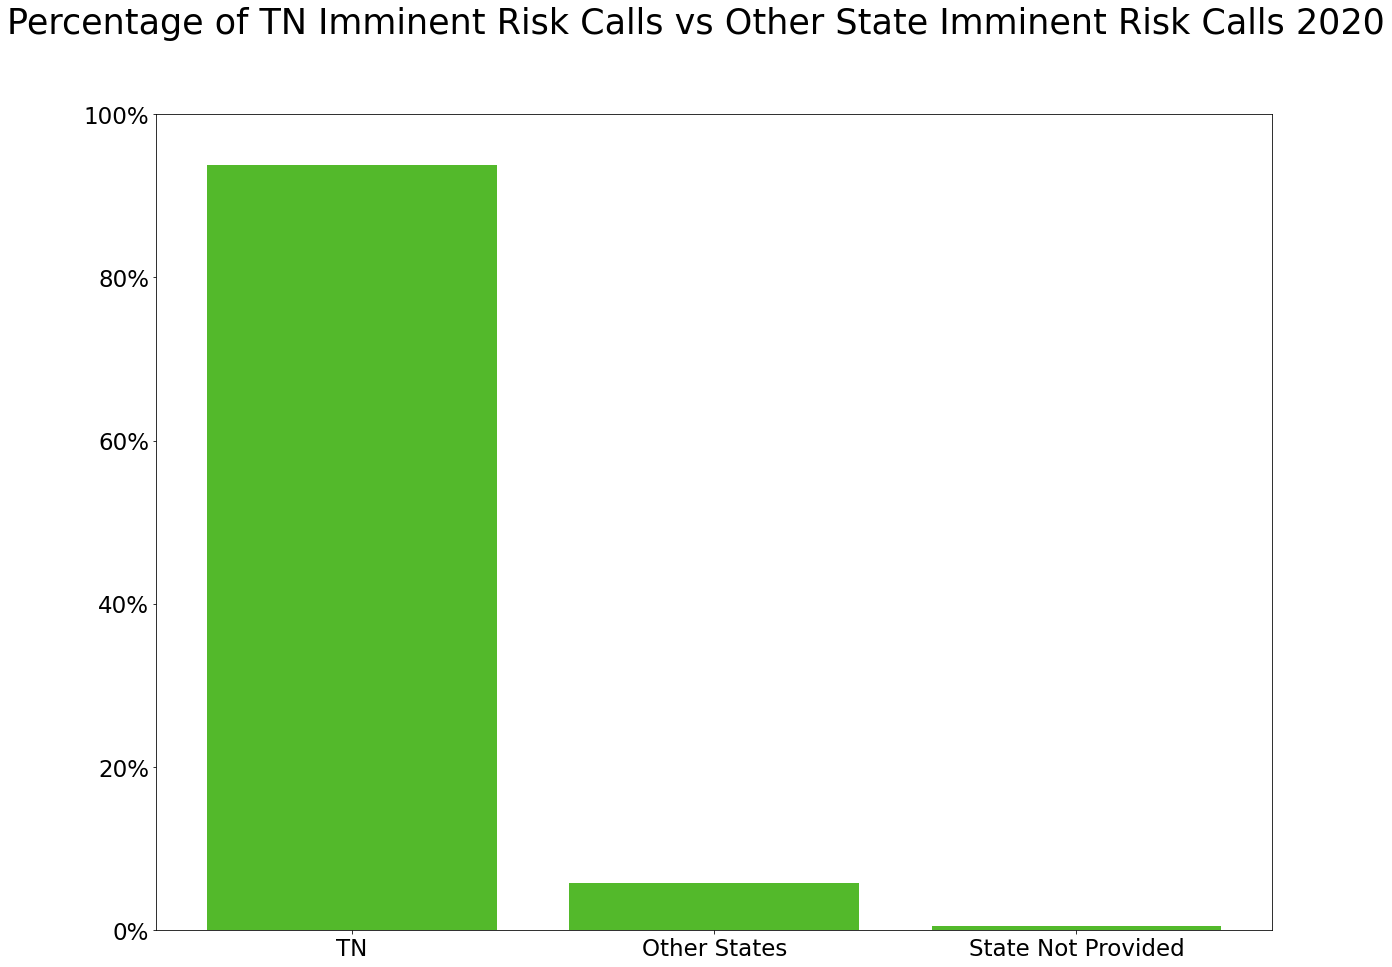

In [38]:
#created chart to plot the percentage of other state calls to TN calls
ticksy = ['0%', '20%', '40%', '60%', '80%', '100%']
plt.figure(figsize = (20,15))
plt.bar(range(len(crisis_call_2020_ratio)), list(crisis_call_2020_ratio.values()), align='center', color = '#53b92b')
plt.xticks(range(len(crisis_call_2020_ratio)), list(crisis_call_2020_ratio.keys()), fontsize = 23)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],ticksy, fontsize = 23)
plt.suptitle('Percentage of TN Imminent Risk Calls vs Other State Imminent Risk Calls 2020', fontsize = 35)

### Subsetting to find the perecentage of calls in TN vs other states for 2020

In [39]:
#every call report number seems to be unique
fcs_data_2020['CallReportNum'].nunique()

22326

In [40]:
#every call seems to not be null
fcs_data_2020['CallLength'].isnull().value_counts()

False    22326
Name: CallLength, dtype: int64

In [41]:
#there seems to be 58 null values for the stateprovince column
fcs_data_2020['StateProvince'].isnull().value_counts()

False    22268
True        58
Name: StateProvince, dtype: int64

In [42]:
#created a subset dataframe to help answer the question
state_calls_2020 = fcs_data_2020[['StateProvince','CallReportNum','CallLength']]

In [43]:
#checking to see the dataframe got created properly
state_calls_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   StateProvince  22268 non-null  object
 1   CallReportNum  22326 non-null  int64 
 2   CallLength     22326 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 523.4+ KB


In [44]:
#dropping null values
state_calls_2020 = state_calls_2020.dropna(subset = ['StateProvince'])

In [45]:
#checking to make sure the null values were dropped
state_calls_2020.isnull().value_counts()

StateProvince  CallReportNum  CallLength
False          False          False         22268
dtype: int64

In [46]:
#checking the shape of the dataframe
state_calls_2020.head()

,StateProvince,CallReportNum,CallLength
0,TX,82699332,13
1,TN,82689642,29
2,TN,82688780,30
3,TN,82688656,16
4,WA,82688670,7


In [47]:
#checking the shape of the dataframe
state_calls_2020.tail()

,StateProvince,CallReportNum,CallLength
22321,TN,69492892,14
22322,TN,69492741,20
22323,TN,69492019,18
22324,TN,69492070,4
22325,TN,69492055,1


In [48]:
#counting how many times a state appears
state_calls_2020['StateProvince'].value_counts()

TN    20418
WI      350
TX      227
MN      132
KS      117
KY      111
MS       98
FL       85
GA       74
WY       58
IN       57
CA       52
OK       42
AL       39
OR       37
IL       35
NV       31
NY       30
PA       26
NE       23
OH       23
VA       20
NJ       19
AZ       15
BC       15
NC       15
MD       14
MI       13
MA       12
WA       12
NM        8
CO        8
MO        8
LA        7
CT        5
AR        4
AK        4
IA        3
RI        3
SC        3
WV        3
HI        2
MT        2
ID        2
PR        1
QC        1
NH        1
ND        1
UT        1
ME        1
Name: StateProvince, dtype: int64

In [49]:
#making a dictionary of all states
state_dict_2020 = {'TN':20418, 'WI':350,'TX':227,'MN':132,'KS':117,'KY':111,
            'MS':98,'FL':85,'GA':74,'WY':58,'IN':57,'CA':52,'OK':42,'AL':39,'OR':37,
              'IL':35,'NV':31,'NY':30,'PA':26,'OH':23,'NE':23,'VA':20,'NJ':19,'AZ':15,'NC':15,
              'BC':15,'MD':14,'MI':13,'WA':12,'MA':12,'NM': 8,'CO': 8,'MO': 8,'LA': 7,'CT': 5,'AR': 4,'AK': 4,
              'RI': 3,'SC': 3,'WV': 3,'IA': 3,'MT': 2,'HI': 2,'ID': 2,'ME': 1,'QC': 1,'ND': 1,'NH': 1,'UT': 1,'PR': 1}

In [50]:
#breaking down the dictionary into percentages of a whole
s = sum(state_dict_2020.values())
for k, v in state_dict_2020.items():
    pct = v * 100.0 / s
    print(k, pct)

TN 91.69211424465601
WI 1.5717621699299442
TX 1.0194000359259925
MN 0.5927788755164362
KS 0.5254176396622957
KY 0.49847314532063947
MS 0.4400934075803844
FL 0.38171366984012933
GA 0.33231543021375964
WY 0.2604634453026765
IN 0.25597269624573377
CA 0.2335189509610203
OK 0.18861146039159332
AL 0.17513921322076523
OR 0.16615771510687982
IL 0.15717621699299444
NV 0.13921322076522363
NY 0.13472247170828094
PA 0.11675947548051015
OH 0.10328722830968205
NE 0.10328722830968205
VA 0.08981498113885396
NJ 0.08532423208191127
AZ 0.06736123585414047
NC 0.06736123585414047
BC 0.06736123585414047
MD 0.06287048679719777
MI 0.058379737740255074
WA 0.05388898868331238
MA 0.05388898868331238
NM 0.03592599245554159
CO 0.03592599245554159
MO 0.03592599245554159
LA 0.031435243398598885
CT 0.02245374528471349
AR 0.017962996227770794
AK 0.017962996227770794
RI 0.013472247170828094
SC 0.013472247170828094
WV 0.013472247170828094
IA 0.013472247170828094
MT 0.008981498113885397
HI 0.008981498113885397
ID 0.00898

In [51]:
#listing all calls and all others states
total_calls_2020 = 22326
state_dict_2020_total = {'TN':20418, 'Other States':1850, 'State Not Provided':58}

In [52]:
#breaking down the dictionary into a percentage of a whole for all states combined
s = sum(state_dict_2020_total.values())
for k, v in state_dict_2020_total.items():
    pct = v * 100.0 / s
    print(k, pct)

TN 91.45391023918302
Other States 8.286302965152737
State Not Provided 0.25978679566424795


In [53]:
#creating a dictionary where the percentages can be plotted
state_call_2020_ratio = {} # Defining an empty dictionary
for i in state_dict_2020_total:
    state_call_2020_ratio [i] = state_dict_2020_total [i]/total_calls_2020

Text(0.5, 0.98, 'Percentage of TN Calls vs Other State Calls 2020')

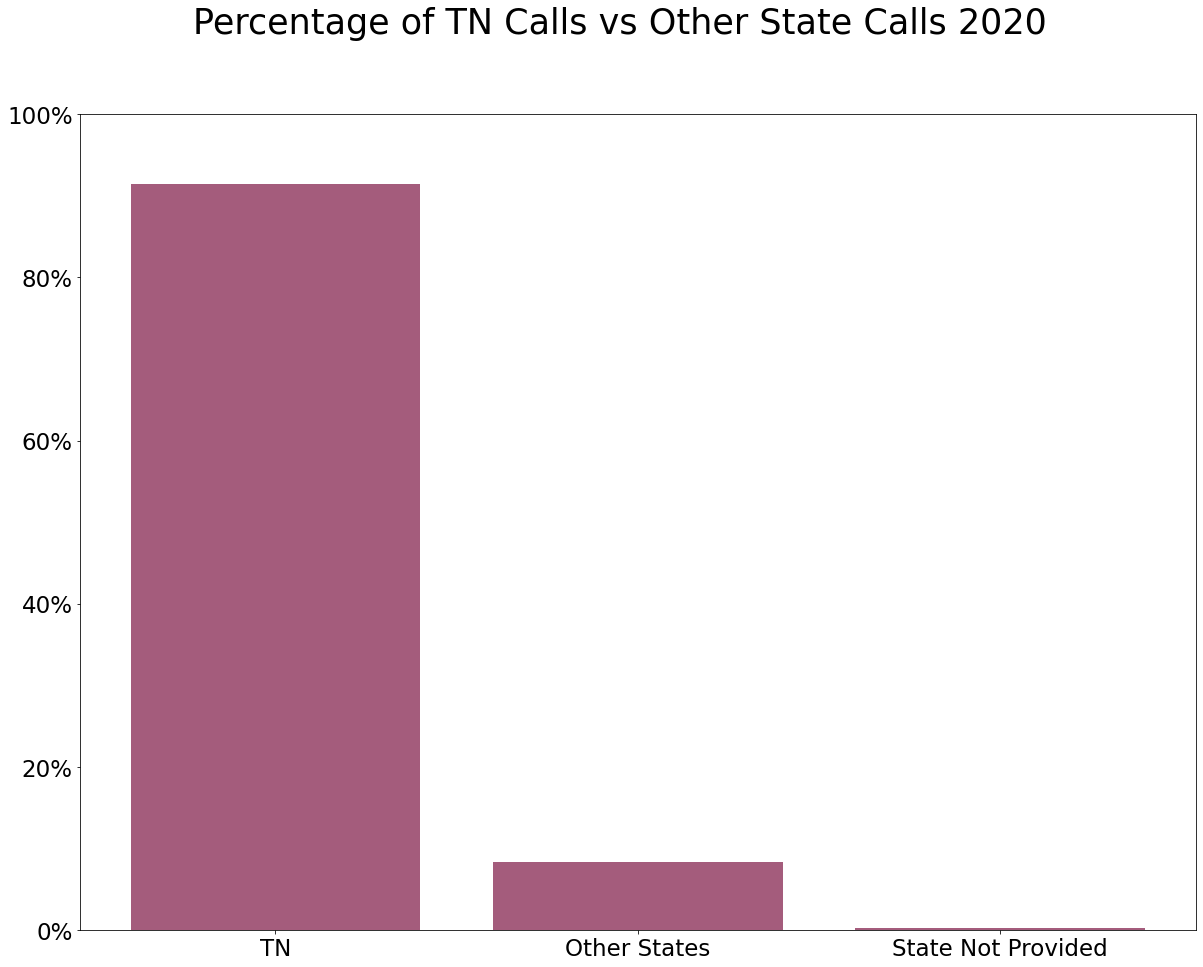

In [54]:
#created chart to plot the percentage of other state calls to TN calls
ticksy = ['0%', '20%', '40%', '60%', '80%', '100%']
plt.figure(figsize = (20,15))
plt.bar(range(len(state_call_2020_ratio)), list(state_call_2020_ratio.values()), align='center', color = '#a45c7c')
plt.xticks(range(len(state_call_2020_ratio)), list(state_call_2020_ratio.keys()), fontsize = 23)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],ticksy, fontsize = 23)
plt.suptitle('Percentage of TN Calls vs Other State Calls 2020', fontsize = 35)

### Subsetting to find the perecentage of calls in TN vs other states for 2019

In [55]:
#every call report number seems to be unique
fcs_data_2019['ï»¿CallReportNum'].nunique()

16033

In [56]:
#every call seems to not be null
fcs_data_2019['CallLength'].isnull().value_counts()

False    16033
Name: CallLength, dtype: int64

In [57]:
#there seems to be 58 null values for the stateprovince column
fcs_data_2019['StateProvince'].isnull().value_counts()

False    15941
True        92
Name: StateProvince, dtype: int64

In [58]:
#created a subset dataframe to help answer the question
state_calls_2019 = fcs_data_2019[['StateProvince','ï»¿CallReportNum','CallLength']]

In [59]:
#checking to see the dataframe got created properly
state_calls_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16033 entries, 0 to 16032
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   StateProvince     15941 non-null  object
 1   ï»¿CallReportNum  16033 non-null  int64 
 2   CallLength        16033 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 375.9+ KB


In [60]:
#dropping null values
state_calls_2019 = state_calls_2019.dropna(subset = ['StateProvince'])

In [61]:
#checking to make sure the null values were dropped
state_calls_2019.isnull().value_counts()

StateProvince  ï»¿CallReportNum  CallLength
False          False             False         15941
dtype: int64

In [62]:
#checking the shape of the dataframe
state_calls_2019.head()

,StateProvince,ï»¿CallReportNum,CallLength
0,TN,69489998,15
1,TN,69489941,1
2,TN,69487955,43
3,TN,69487196,21
4,MS,69486598,19


In [63]:
#checking the shape of the dataframe
state_calls_2019.tail()

,StateProvince,ï»¿CallReportNum,CallLength
16028,TN,59123033,51
16029,TN,59122623,32
16030,TN,59122574,2
16031,TN,59122508,5
16032,TN,59122071,3


In [64]:
#counting how many times a state appears
state_calls_2019['StateProvince'].value_counts()

TN    15051
WI      237
NV       96
KY       96
MS       65
FL       46
CA       40
IN       37
GA       33
AL       31
OK       26
IL       25
NY       19
MI       17
TX       11
CT       10
LA       10
NC        9
NJ        8
MD        7
PA        7
VA        7
AZ        6
WA        6
BC        5
SC        5
MO        4
OR        4
NE        3
MN        3
IA        3
NM        2
CO        2
MA        2
WV        1
NL        1
AR        1
KS        1
ME        1
DC        1
VT        1
OH        1
Name: StateProvince, dtype: int64

In [65]:
#listing all calls and all others states
total_calls_2019 = 16033
state_dict_2019_total = {'TN':15051, 'Other States':890, 'State Not Provided':92}

In [66]:
#breaking down the dictionary into a percentage of a whole for all states combined
s = sum(state_dict_2019_total.values())
for k, v in state_dict_2019_total.items():
    pct = v * 100.0 / s
    print(k, pct)

TN 93.87513253913802
Other States 5.551050957400362
State Not Provided 0.5738165034616104


In [67]:
#creating a dictionary where the percentages can be plotted
state_call_2019_ratio = {} # Defining an empty dictionary
for i in state_dict_2019_total:
    state_call_2019_ratio [i] = state_dict_2019_total [i]/total_calls_2019

Text(0.5, 0.98, 'Percentage of TN Calls vs Other State Calls 2019')

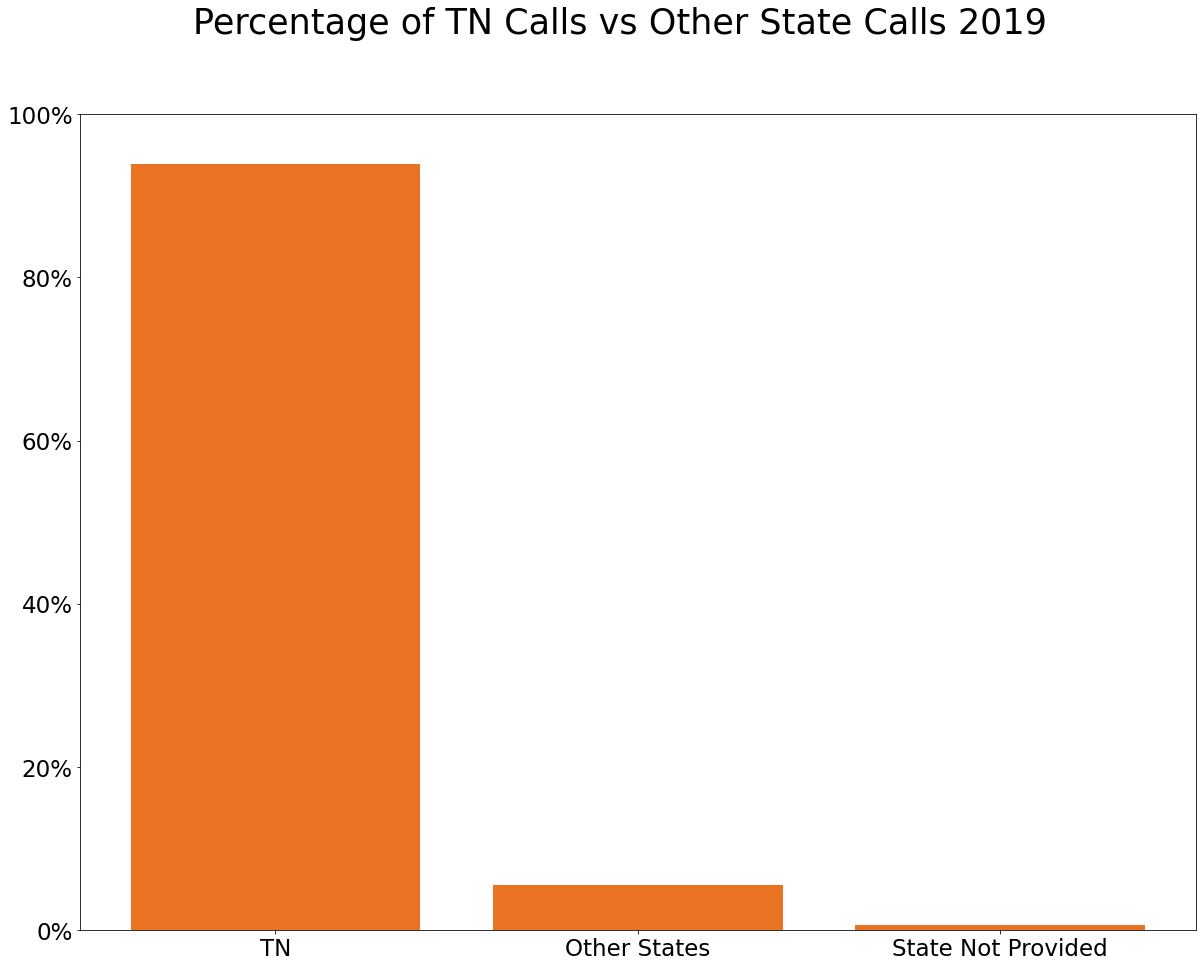

In [68]:
#created chart to plot the percentage of other state calls to TN calls
ticksy = ['0%', '20%', '40%', '60%', '80%', '100%']
plt.figure(figsize = (20,15))
plt.bar(range(len(state_call_2019_ratio)), list(state_call_2019_ratio.values()), align='center', color = '#E97223')
plt.xticks(range(len(state_call_2019_ratio)), list(state_call_2019_ratio.keys()), fontsize = 23)
plt.yticks([0.0,0.2,0.4,0.6,0.8,1.0],ticksy, fontsize = 23)
plt.suptitle('Percentage of TN Calls vs Other State Calls 2019', fontsize = 35)